In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%config InlineBackend.figure_format = "retina"
%matplotlib inline

In [2]:
N = 40 # number of samples from Dirichlet Process
K = 500 # number of mini-sticks, higher number needed for larger alpha

P0 = np.random.normal
x_plot = np.linspace(-3.2, 3.2, num=1001)

def cdf(alpha):
    betas = np.random.beta(1, alpha, size=[N, K])
    betas[:, 1:] = betas[:, 1:] * (1 - betas[:, :-1]).cumprod(axis=1)

    w = betas.copy() # weights
    m = P0(size=[N, K])

    dirac = np.less.outer(m, x_plot).astype(int)
    return (w[..., np.newaxis]*dirac).sum(axis=1)

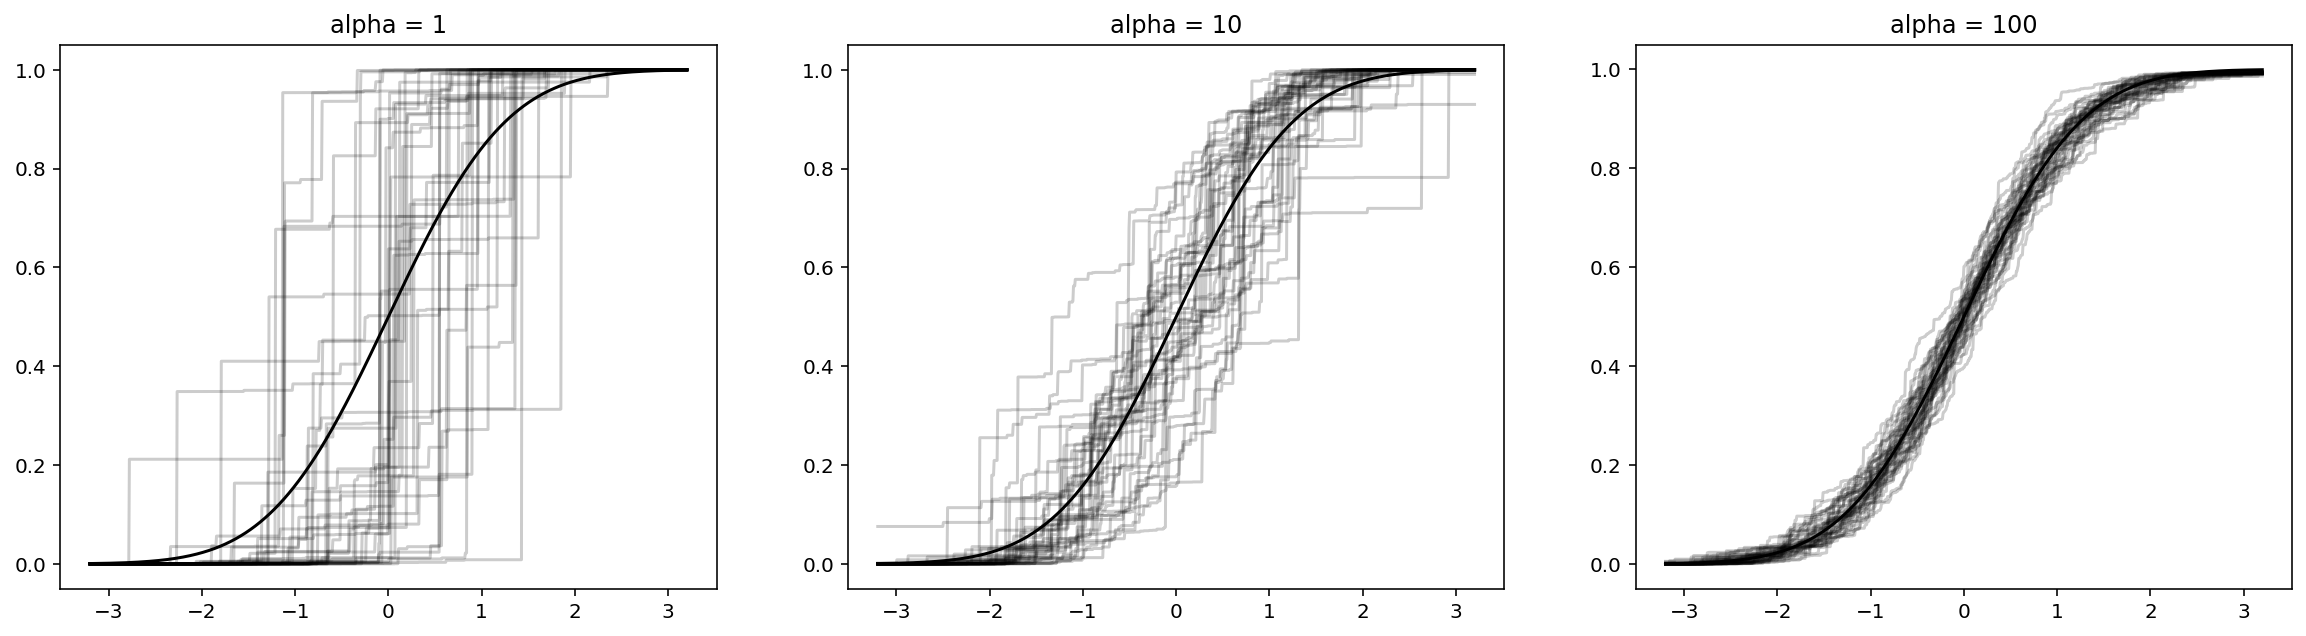

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

cdfs = {
    1: cdf(1),
    10: cdf(10),
    100: cdf(100),
}

for fig_num, (alpha, dp_sample) in enumerate(cdfs.items()):
    for i in range(N):
        ax[fig_num].plot(x_plot, dp_sample[i], c="k", alpha=0.2)

    ax[fig_num].plot(x_plot, st.norm.cdf(x_plot), c="k")
    ax[fig_num].set_title(f"alpha = {alpha}")